# Modelos de AM

In [101]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor,  BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

In [2]:
datos=pd.read_csv("./datos/train_with_cierre/ap1_por_tema.csv")

In [3]:
datos.head()

,Dates,america movil_positivos,america movil_negativos,america movil_neutros,banco de mexico_positivos,banco de mexico_negativos,banco de mexico_neutros,mexico_positivos,mexico_negativos,mexico_neutros,...,presidente de mexico_negativos,presidente de mexico_neutros,cetes_positivos,cetes_negativos,cetes_neutros,var_rel_apertura,var_rel_cierre,rate_ap_cierre,volume,cierre_next_day
0,2016-01-04,0.0,0.0,0.019608,0.0,0.000000,0.019608,0.000000,0.019608,0.098039,...,0.000000,0.019608,0.0,0.0,0.019608,5.479779,5.590406,1.020188,122098600.0,-0.001710
1,2016-01-05,0.0,0.0,0.019608,0.0,0.000000,0.019608,0.000000,0.019608,0.098039,...,0.000000,0.019608,0.0,0.0,0.019608,0.724083,0.725407,1.001830,186120200.0,-0.008337
2,2016-01-06,0.0,0.0,0.019608,0.0,0.006536,0.013072,0.000000,0.028322,0.089325,...,0.000000,0.019608,0.0,0.0,0.019608,0.868997,0.876251,1.008348,185518000.0,-0.024696
3,2016-01-07,0.0,0.0,0.019608,0.0,0.002179,0.017429,0.000000,0.021786,0.095861,...,0.000000,0.019608,0.0,0.0,0.019608,6.648252,6.816198,1.025262,263904200.0,-0.009744
4,2016-01-08,0.0,0.0,0.019608,0.0,0.000726,0.018882,0.001452,0.021786,0.094408,...,0.000726,0.018882,0.0,0.0,0.019608,4.459573,4.503480,1.009846,373461300.0,0.010965


In [4]:
Y=datos["cierre_next_day"]
Y_train=Y.iloc[0:607]
Y_test=Y.iloc[608:]
Y_train.head()

0   -0.001710
1   -0.008337
2   -0.024696
3   -0.009744
4    0.010965
Name: cierre_next_day, dtype: float64

SyntaxError: invalid syntax (<ipython-input-154-b0350304af2a>, line 1)

In [156]:
X=datos.iloc[:,1:123]
X_train=X.iloc[0:607,:]
X_test=X.iloc[608:,:]
X_train.head()

,america movil_positivos,america movil_negativos,america movil_neutros,banco de mexico_positivos,banco de mexico_negativos,banco de mexico_neutros,mexico_positivos,mexico_negativos,mexico_neutros,bmv_positivos,...,pinfra_negativos,pinfra_neutros,santander mexico_positivos,santander mexico_negativos,santander mexico_neutros,presidente de mexico_positivos,presidente de mexico_negativos,presidente de mexico_neutros,cetes_positivos,cetes_negativos
0,0.0,0.0,0.019608,0.0,0.000000,0.019608,0.000000,0.019608,0.098039,0.0,...,0.000000,0.019608,0.000000,0.000000,0.019608,0.0,0.000000,0.019608,0.0,0.0
1,0.0,0.0,0.019608,0.0,0.000000,0.019608,0.000000,0.019608,0.098039,0.0,...,0.004357,0.015251,0.000000,0.000000,0.019608,0.0,0.000000,0.019608,0.0,0.0
2,0.0,0.0,0.019608,0.0,0.006536,0.013072,0.000000,0.028322,0.089325,0.0,...,0.000000,0.019608,0.000000,0.002179,0.017429,0.0,0.000000,0.019608,0.0,0.0
3,0.0,0.0,0.019608,0.0,0.002179,0.017429,0.000000,0.021786,0.095861,0.0,...,0.000000,0.019608,0.000000,0.000000,0.019608,0.0,0.000000,0.019608,0.0,0.0
4,0.0,0.0,0.019608,0.0,0.000726,0.018882,0.001452,0.021786,0.094408,0.0,...,0.000000,0.019608,0.000726,0.000000,0.018882,0.0,0.000726,0.018882,0.0,0.0


## Regresión lineal

In [6]:
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)
y_reg_pred = reg.predict(X_test)

In [7]:
sum(abs(y_reg_pred-Y_test))

145407833797.44983

In [8]:
np.dot(y_reg_pred-Y_test,y_reg_pred-Y_test)


6.160246950194172e+21

## La Regresión Lineal con Regularización Ridge


In [25]:
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train, Y_train)
ridge_pred = ridge.predict(X_test)

In [26]:
sum(abs(ridge_pred-Y_test))

1.633777521371477

In [27]:
np.dot(ridge_pred-Y_test,ridge_pred-Y_test)

0.026119840396523843

In [28]:
pred=ridge_pred>0
real=Y_test>0
sum(pred==real)/real.shape[0]


0.5615763546798029

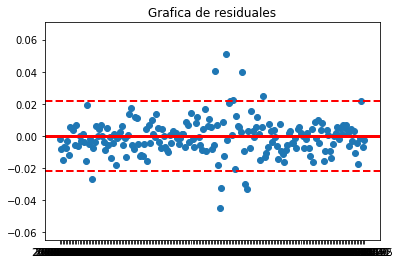

In [51]:
fechas=datos.iloc[608:,0]
residuales=ridge_pred-Y_test
plt.scatter(fechas,residuales)
plt.axhline(y=0,color='red',linewidth=3)
plt.axhline(y=-1.96*desv,color='red',linewidth=2,linestyle='--')
plt.axhline(y=+1.96*desv,color='red',linewidth=2,linestyle='--')
plt.tick_params(axis='both',which='major')
plt.title("Grafica de residuales")
plt.show()

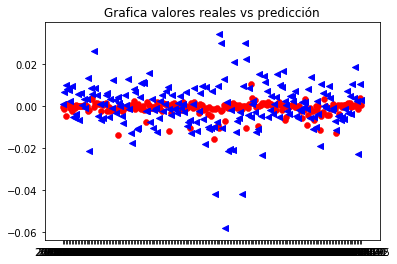

In [155]:
plt.scatter(fechas,ridge_pred,color='red',linewidth=0.5)
plt.scatter(fechas,Y_test,color='blue',marker='<')
plt.tick_params(axis='both',which='major')
plt.title("Grafica valores reales vs predicción")
plt.show()

## La Regresión Lineal con Regularización Lasso

In [14]:
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, Y_train)
lasso_pred = lasso.predict(X_test)

In [15]:
sum(abs(lasso_pred-Y_test))

1.5963707287329594

In [16]:
np.dot(lasso_pred-Y_test,lasso_pred-Y_test)

0.02487607561109877

In [17]:
pred=lasso_pred>0
real=Y_test>0
sum(pred==real)/real.shape[0]

0.4975369458128079

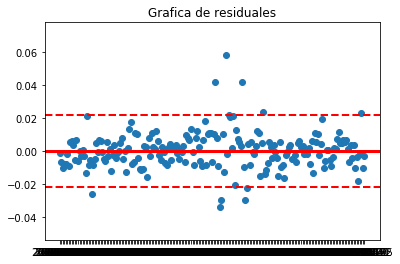

In [50]:
residuales=lasso_pred-Y_test
desv=np.std(residuales)
plt.scatter(fechas,residuales)
plt.axhline(y=0,color='red',linewidth=3)
plt.axhline(y=-1.96*desv,color='red',linewidth=2,linestyle='--')
plt.axhline(y=+1.96*desv,color='red',linewidth=2,linestyle='--')
plt.tick_params(axis='both',which='major')
plt.title("Grafica de residuales")
plt.show()

## Árboles

### Random Forest

In [31]:

ran_forest = RandomForestRegressor(n_estimators=100) 
ran_forest.fit(X_train, Y_train)
ran_forest_pred = ran_forest.predict(X_test)


In [32]:
sum(abs(ran_forest_pred-Y_test))

1.69278256628744

In [33]:
np.dot(ran_forest_pred-Y_test,ran_forest_pred-Y_test)

0.026622104425543067

In [34]:
pred=ran_forest_pred>0
real=Y_test>0
sum(pred==real)/real.shape[0]

0.46798029556650245

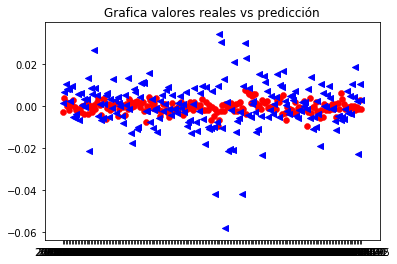

In [58]:

plt.scatter(fechas,ran_forest_pred,color='red',linewidth=0.5)
plt.scatter(fechas,Y_test,color='blue',marker='<')
plt.tick_params(axis='both',which='major')
plt.title("Grafica valores reales vs predicción")
plt.show()

### Bagging

In [60]:

bagg = BaggingRegressor(n_estimators=60,max_features=1) 
bagg.fit(X_train, Y_train)
bagg_pred = bagg.predict(X_test)

In [61]:
sum(abs(bagg_pred-Y_test))

1.596795360655436

In [62]:
np.dot(bagg_pred-Y_test,bagg_pred-Y_test)

0.02491762840989683

In [63]:
pred=bagg_pred>0
real=Y_test>0
sum(pred==real)/real.shape[0]

0.5073891625615764

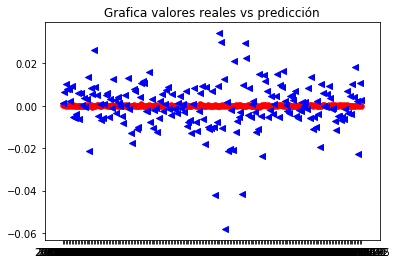

In [64]:
plt.scatter(fechas,bagg_pred,color='red',linewidth=0.5)
plt.scatter(fechas,Y_test,color='blue',marker='<')
plt.tick_params(axis='both',which='major')
plt.title("Grafica valores reales vs predicción")
plt.show()

### GradientBoosting

In [65]:
grad_boost = GradientBoostingRegressor(n_estimators=50,learning_rate=0.005) 
grad_boost.fit(X_train, Y_train)
grad_boost_pred =grad_boost.predict(X_test)

In [66]:
sum(abs(grad_boost_pred-Y_test))

1.5953955774647568

In [67]:
np.dot(grad_boost_pred-Y_test,grad_boost_pred-Y_test)

0.02496312243215958

In [68]:
pred=grad_boost_pred>0
real=Y_test>0
sum(pred==real)/real.shape[0]

0.4975369458128079

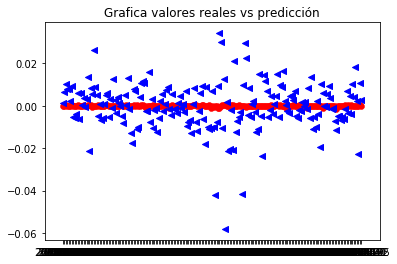

In [69]:
plt.scatter(fechas,grad_boost_pred,color='red',linewidth=0.5)
plt.scatter(fechas,Y_test,color='blue',marker='<')
plt.tick_params(axis='both',which='major')
plt.title("Grafica valores reales vs predicción")
plt.show()

### AdaBoost

In [70]:
ada = AdaBoostRegressor(n_estimators=40,learning_rate=0.05) 
ada.fit(X_train, Y_train)
ada_pred = ada.predict(X_test)

In [71]:
sum(abs(ada_pred-Y_test))

1.6025039140268342

In [72]:
np.dot(ada_pred-Y_test,ada_pred-Y_test)

0.025102496106144272

In [73]:
pred=ada_pred>0
real=Y_test>0
sum(pred==real)/real.shape[0]

0.4827586206896552

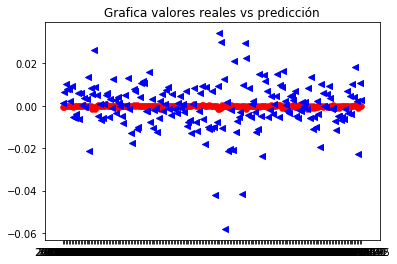

In [74]:
plt.scatter(fechas,ada_pred,color='red',linewidth=0.5)
plt.scatter(fechas,Y_test,color='blue',marker='<')
plt.tick_params(axis='both',which='major')
plt.title("Grafica valores reales vs predicción")
plt.show()

## XGBoost

In [75]:
xgb = XGBRegressor(max_depth=1, learning_rate=0.1, n_estimators=60)
xgb.fit(X_train, Y_train)
xgb_pred =xgb.predict(X_test)

In [76]:
sum(abs(xgb_pred-Y_test))

1.5954270082633037

In [77]:
np.dot(xgb_pred-Y_test,xgb_pred-Y_test)

0.02491841381448595

In [78]:
pred=xgb_pred>0
real=Y_test>0
sum(pred==real)/real.shape[0]

0.49261083743842365

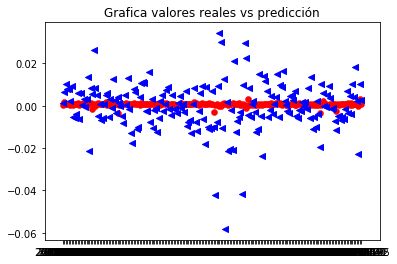

In [79]:
plt.scatter(fechas,xgb_pred,color='red',linewidth=0.5)
plt.scatter(fechas,Y_test,color='blue',marker='<')
plt.tick_params(axis='both',which='major')
plt.title("Grafica valores reales vs predicción")
plt.show()

## K-Vecinos más cercanos

In [95]:
k_vecinos = KNeighborsRegressor(n_neighbors=10) 
k_vecinos.fit(X_train, Y_train)
k_vecinos_pred = k_vecinos.predict(X_test)



In [96]:
sum(abs(k_vecinos_pred-Y_test))

1.6332532507610995

In [97]:
np.dot(k_vecinos_pred-Y_test,k_vecinos_pred-Y_test)

0.02614135288924185

In [98]:
pred=k_vecinos_pred>0
real=Y_test>0
sum(pred==real)/real.shape[0]

0.5123152709359606

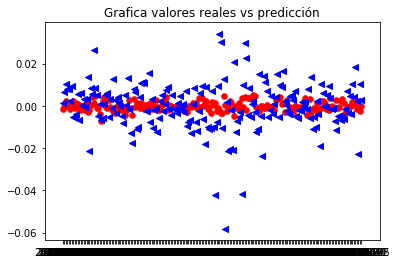

In [99]:
plt.scatter(fechas,k_vecinos_pred,color='red',linewidth=0.5)
plt.scatter(fechas,Y_test,color='blue',marker='<')
plt.tick_params(axis='both',which='major')
plt.title("Grafica valores reales vs predicción")
plt.show()

## Redes neuronales

In [132]:
red = MLPRegressor(activation='relu', solver='adam',learning_rate='adaptive',momentum=0.1) 
red.fit(X_train, Y_train)
red_pred = red.predict(X_test)

In [133]:
sum(abs(red_pred-Y_test))

1.6247872633311193

In [134]:
np.dot(red_pred-Y_test,red_pred-Y_test)

0.02590403176236285

In [135]:
pred=red_pred>0
real=Y_test>0
sum(pred==real)/real.shape[0]

0.4876847290640394

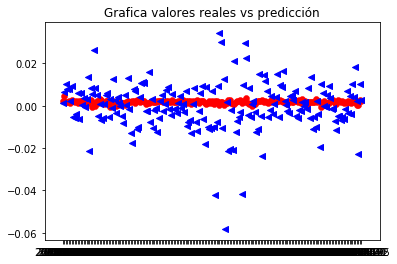

In [131]:
plt.scatter(fechas,red_pred,color='red',linewidth=0.5)
plt.scatter(fechas,Y_test,color='blue',marker='<')
plt.tick_params(axis='both',which='major')
plt.title("Grafica valores reales vs predicción")
plt.show()